In [6]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import urllib3
import csv
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #洗牌

import json
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow
import keras
from keras.layers import Dropout
from sklearn.preprocessing import OneHotEncoder

#, plot_confusion_matrix

In [7]:
with open('train.json','r', encoding='utf-8') as f:
    train_file = json.load(f)
with open('test.json','r', encoding='utf-8') as fi:
    test_file = json.load(fi)

In [8]:
def text_data(input_data):
    #text = []
    text = [" ".join( n['ingredients']).lower() for n in input_data]
    #for n in input_data:
        #text.extend(n['ingredients'])
    return text

train_text = text_data(train_file)
test_text = text_data(test_file)
#print(test_text)

In [9]:
def data_make(text, flag):
    if flag == "train":
        x_val = tf.fit_transform(text)
    else:
        x_val = tf.transform(text)
        
    
    x_val = x_val.astype('float')
    return x_val

tf = TfidfVectorizer(binary=True )
x_data = data_make(train_text, flag="train")
x_test = data_make(test_text, flag="test")
#print(type(x_data))

In [10]:
cuisine_target = [ n['cuisine']  for n in train_file]
label = LabelEncoder()
label.fit(cuisine_target)
y_data = label.transform(cuisine_target)
y_data = keras.utils.to_categorical(y_data)
#print(len(y_data))
#print(0.7*len(y_data))

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(x_data,y_data,random_state=123, train_size=0.7,test_size = 0.3)
x_data, y_data = shuffle(x_data,y_data,random_state= 123)
#x_valid = x_valid.toarray()
#x_train = x_train.toarray()
#print(x_train)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1000, activation='relu', kernel_initializer = keras.initializers.RandomNormal(), input_dim=2860))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(500, activation='relu', kernel_initializer = keras.initializers.RandomNormal() ))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(300, activation='relu', kernel_initializer = keras.initializers.RandomNormal()))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(20, activation='softmax'))
model.compile(optimizer='Adam', loss= tensorflow.keras.losses.mean_squared_error , metrics=['accuracy'])


#print(x_train)
model.fit(x_data, y_data, validation_split=0.3, epochs=10) #

Instructions for updating:
Use tf.cast instead.
Train on 20841 samples, validate on 8933 samples
Epoch 1/10
20841/20841 [==============================] - 35s 2ms/step - loss: 0.0280 - accuracy: 0.5554 - val_loss: 0.0215 - val_accuracy: 0.6755
Epoch 2/10
20841/20841 [==============================] - 34s 2ms/step - loss: 0.0195 - accuracy: 0.7107 - val_loss: 0.0189 - val_accuracy: 0.7260
Epoch 3/10
20841/20841 [==============================] - 33s 2ms/step - loss: 0.0162 - accuracy: 0.7647 - val_loss: 0.0175 - val_accuracy: 0.7583
Epoch 4/10
20841/20841 [==============================] - 33s 2ms/step - loss: 0.0134 - accuracy: 0.8108 - val_loss: 0.0169 - val_accuracy: 0.7695
Epoch 5/10
20841/20841 [==============================] - 34s 2ms/step - loss: 0.0115 - accuracy: 0.8420 - val_loss: 0.0172 - val_accuracy: 0.7660
Epoch 6/10
20841/20841 [==============================] - 33s 2ms/step - loss: 0.0101 - accuracy: 0.8632 - val_loss: 0.0168 - val_accuracy: 0.7744
Epoch 7/10
20841/2084

In [13]:
loss, accuracy = model.evaluate(x_data, y_data)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, 100 * accuracy))

29774/29774 [==============================] - 5s 165us/step

Loss: 0.01, Accuracy: 89.90%


In [9]:
y_test = model.predict(x_test)
y_test = np.argmax(y_test, axis=1)
cuisine_test = label.inverse_transform(y_test)
#print(y_test)

In [12]:
ids = [  n['id'] for n in test_file]
csv = pd.DataFrame( {'Id':ids, 'Category':cuisine_test}, columns = ['Id','Category'] )
csv.to_csv('y_test.csv',index=False)


              precision    recall  f1-score   support

           0       0.72      0.52      0.61       101
           1       0.42      0.61      0.50       184
           2       0.76      0.68      0.72       362
           3       0.78      0.85      0.82       610
           4       0.54      0.62      0.58       144
           5       0.62      0.65      0.64       622
           6       0.70      0.74      0.72       279
           7       0.85      0.94      0.89       663
           8       0.55      0.59      0.57       152
           9       0.86      0.85      0.85      1804
          10       0.81      0.75      0.78       106
          11       0.86      0.61      0.71       330
          12       0.81      0.71      0.76       189
          13       0.93      0.92      0.93      1401
          14       0.90      0.71      0.80       182
          15       0.43      0.39      0.41       110
          16       0.78      0.76      0.77       980
          17       0.54    

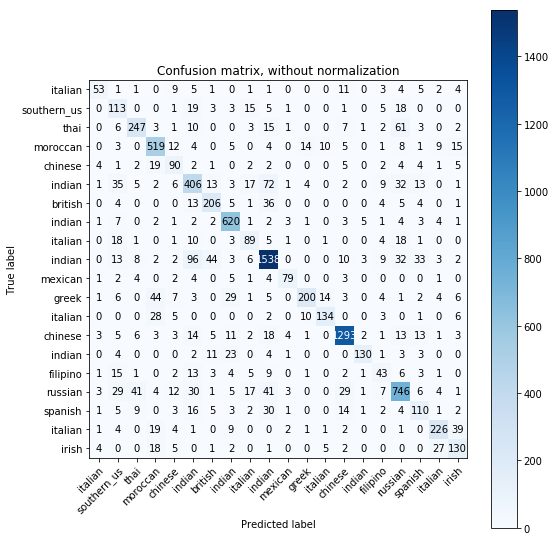

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
   
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

y_pred = model.predict(x_data[20841:])
y_test = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_data[20841:], axis=1), y_test))
plot_confusion_matrix(np.argmax(y_data[20841:], axis=1), y_test, classes=cuisine_target , cmap=plt.cm.Blues)
